In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
step_size = .02
prediction_history = np.array([])
# Given houses h0, h1 and h2 (features and sales price) predict sales price of unknown house hx
# features are Bedroms, Bathrooms, Thousands_square_feet
# target is hundreds_thousands_dollars
features = ['Bedrooms', 'Bathrooms', 'Square Feet']
house_0 = np.array([[3, 3, 3]])
house_1 = np.array([[3, 2, 2.5]])
house_2 = np.array([[4, 4, 3.2]])
house_x = np.array([[4, 4, 3.1]])
X = np.vstack([house_0,house_1,house_2])
X

array([[3. , 3. , 3. ],
       [3. , 2. , 2.5],
       [4. , 4. , 3.2]])

In [2]:
y = prices = np.array([[3.50000, 3.00000, 4.25000]]).T
prices

array([[3.5 ],
       [3.  ],
       [4.25]])

In [3]:
# start with a random guess at weights:
w = np.random.random(3).reshape(3,1)
w

array([[0.24426763],
       [0.99958217],
       [0.37259351]])

# Initial Estimate of House X

In [4]:
# initial estimate of price of house_x:
house_x.dot(w)
prediction_history = np.vstack([X.dot(w),house_x.dot(w)])
print(house_x.dot(w))

[[6.13043906]]


# First Set of Predictions

In [5]:
# first estimate of prices of h0:
prediction = X[0,:].dot(w)
prediction

array([4.84932991])

In [6]:
# calculate error on prediction 0
Error = (prediction-y[0])**2
Error

array([1.82069121])

In [7]:
# calculate partial derivative of Error of prediction zero, with respect to w0
partial_E_w0 = -2*X[0,0]*(y[0]-(X[0,:].dot(w)))
partial_E_w0

array([8.09597947])

In [8]:
# calculate partial derivative of Error of prediction zero, with respect to w1
partial_E_w1 = -2*X[0,1]*(y[0]-(X[0,:].dot(w)))
partial_E_w1

array([8.09597947])

In [9]:
# calculate partial derivative of Error of prediction zero, with respect to w2
partial_E_w2 = -2*X[0,2]*(y[0]-(X[0,:].dot(w)))
partial_E_w2

array([8.09597947])

In [10]:
# calculate adjustment: very small step in negative direction of partial derivative vector
adjustment = np.array([partial_E_w0,partial_E_w1,partial_E_w2])*(-step_size)
adjustment

array([[-0.16191959],
       [-0.16191959],
       [-0.16191959]])

In [11]:
# Add adjustment to existing weight values
w += adjustment
w

array([[0.08234804],
       [0.83766258],
       [0.21067392]])

In [12]:
# new estimate of price of house_0:
X[0,:].dot(w)

array([3.39205361])

In [13]:
# new estimate of price of house_x:
house_x.dot(w)
prediction_history = np.hstack([prediction_history,np.vstack([X.dot(w),house_x.dot(w)])])

In [14]:
# predict price of house 1:
prediction_1 = X[1,:].dot(w)
prediction_1

array([2.44905407])

In [15]:
# Find the error on house 1
Error = (prediction-y[1])**2
Error

array([3.42002112])

In [16]:
# calculate partial derivative of Error of prediction one, with respect to w0
partial_E_w0 = -2*X[1,0]*(y[1]-(X[1,:].dot(w)))
partial_E_w0

array([-3.30567558])

In [17]:
# calculate partial derivative of Error of prediction one, with respect to w1
partial_E_w1 = -2*X[1,1]*(y[1]-(X[1,:].dot(w)))
partial_E_w1

array([-2.20378372])

In [18]:
# calculate partial derivative of Error of prediction one, with respect to w2
partial_E_w2 = -2*X[1,2]*(y[1]-(X[1,:].dot(w)))
partial_E_w2

array([-2.75472965])

In [19]:
adjustment = np.array([partial_E_w0,partial_E_w1,partial_E_w2])*(-step_size)
adjustment

array([[0.06611351],
       [0.04407567],
       [0.05509459]])

In [20]:
w += adjustment
w

array([[0.14846155],
       [0.88173825],
       [0.26576851]])

In [21]:
# new estimate of hx:
house_x.dot(w)
prediction_history = np.hstack([prediction_history,np.vstack([X.dot(w),house_x.dot(w)])])

In [22]:
# first estimate of price of h2:
X[2,:].dot(w)

array([4.97125845])

In [23]:
# fnd the error on house 2
Error = (prediction-y[0])**2
Error

array([1.82069121])

In [24]:
# calculate partial derivative of Error of prediction two, with respect to w0
partial_E_w0 = -2*X[2,0]*(y[2]-(X[2,:].dot(w)))
partial_E_w0

array([5.7700676])

In [25]:
# calculate partial derivative of Error of prediction two, with respect to w1
partial_E_w1 = -2*X[2,1]*(y[2]-(X[2,:].dot(w)))
partial_E_w1

array([5.7700676])

In [26]:
# calculate partial derivative of Error of prediction two, with respect to w2
partial_E_w2 = -2*X[2,2]*(y[2]-(X[2,:].dot(w)))
partial_E_w0

array([5.7700676])

In [27]:
adjustment = np.array([partial_E_w0,partial_E_w1,partial_E_w2])*(-step_size)
adjustment

array([[-0.11540135],
       [-0.11540135],
       [-0.09232108]])

In [28]:
w += adjustment
w

array([[0.0330602 ],
       [0.7663369 ],
       [0.17344743]])

In [29]:
# new estimage of house X
house_x.dot(w)

array([[3.73527543]])

In [30]:
prediction_history = np.hstack([prediction_history,np.vstack([X.dot(w),house_x.dot(w)])])

# Start of New Epoch

In [31]:
partial_E_w = -2*X[0,:]*(y[0]-(X[0,:].dot(w)))
partial_E_w

array([-3.48879847, -3.48879847, -3.48879847])

In [32]:
adjustment = partial_E_w*(-step_size)
adjustment

array([0.06977597, 0.06977597, 0.06977597])

In [33]:
w += adjustment.reshape(3,1)
w

array([[0.10283617],
       [0.83611287],
       [0.2432234 ]])

In [34]:
prediction_history = np.hstack([prediction_history,np.vstack([X.dot(w),house_x.dot(w)])])

In [35]:
# New estimates of prices:
X.dot(w)

array([[3.54651731],
       [2.58879274],
       [4.53411103]])

In [36]:
w += (-2*X[1,:]*(y[1]-(X[1,:].dot(w)))*(-step_size)).reshape(3,1)
w

array([[0.15218104],
       [0.86900945],
       [0.28434413]])

In [37]:
X.dot(w)

array([[3.91660384],
       [2.90542233],
       [4.99466316]])

In [38]:
prediction_history = np.hstack([prediction_history,np.vstack([X.dot(w),house_x.dot(w)])])

In [39]:
w += (-2*X[2,:]*(y[2]-(X[2,:].dot(w)))*(-step_size)).reshape(3,1)
X.dot(w)

array([[2.91577656],
       [2.07139959],
       [3.73648029]])

In [40]:
prediction_history = np.hstack([prediction_history,np.vstack([X.dot(w),house_x.dot(w)])])

In [41]:
for _ in range(10000):
    for i in range(3):
        w += (-2*X[i,:]*(y[i]-(X[i,:].dot(w)))*(-step_size)).reshape(3,1)
        prediction_history = np.hstack([prediction_history,np.vstack([X.dot(w),house_x.dot(w)])])
X.dot(w)

array([[3.5 ],
       [3.  ],
       [4.25]])

In [42]:
# final estimate of house X price
house_x.dot(w)

array([[4.19791667]])

In [43]:
w

array([[0.40625   ],
       [0.23958333],
       [0.52083333]])

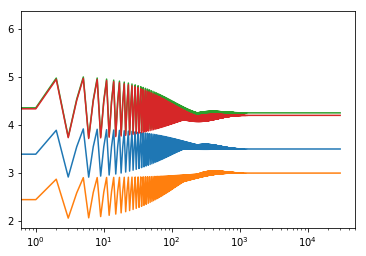

In [47]:
# plt.ylim([-0,5])
plt.xscale('log')
plt.plot(prediction_history.T)
